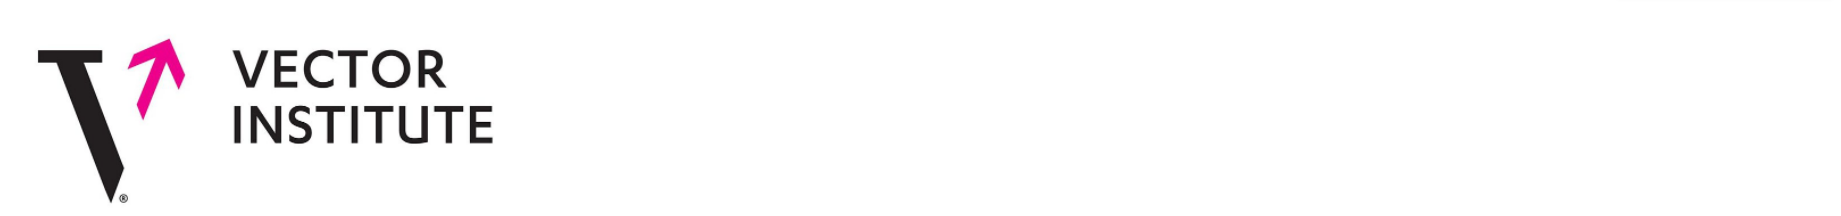

### **Welcome to the Machine Learning Course for Black and Indigenous Students!**
This program is offered by Vector Institute in its drive to build research and expand career pathways in the field of AI for under-represented populations.

*Instructor:* Bonaventure Molokwu | *Assignment Developer:* Manmeet Kaur Baxi | 

*Course Tutors:* Yinka Oladimeji and Manmeet Kaur Baxi | *Course Director:* Shingai Manjengwa (@Tjido) 

### ***Never stop learning!***

# Assignment II - Decision Trees

### Load python packages

In [1]:
import numpy as np    # matrices and high-level math functions
import pandas as pd   # data manipulation
import datetime       # working with dates 

# For data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# For ML part
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Set random seed so that the notebook's output is identical for every run
STATE = 2022
np.random.seed(2022)

### Import dataset

### About the dataset

**Context:**
You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

**Data files:**
1. 'stores.csv': Anonymized information about the 45 stores, indicating the type and size of store
2. 'features.csv': Contains additional data related to the store, department, and regional activity for the given dates.
3. 'sales.csv': Historical sales data, which covers to 2010-02-05 to 2012-11-01.

*Credits:* https://www.kaggle.com/manjeetsingh/retaildataset

In [2]:
PATH = 'https://raw.githubusercontent.com/bhevencious/datasets/main/'

sales_df = pd.read_csv(PATH+'sales.csv')
stores_df = pd.read_csv(PATH+'stores.csv')
features_df = pd.read_csv(PATH+'features.csv')

# Convert object types to datetime
features_df['Date'] = pd.to_datetime(features_df['Date'])
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Merge datasets
features_df = features_df.merge(stores_df, on='Store')
df = features_df.merge(sales_df, on=['Store','Date','IsHoliday'])
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


In [3]:
#features_df = pd.read_csv(features, header=0)

### Exploratory data analysis and data visualization

In [4]:
df.info ()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     150681 non-null  float64       
 5   MarkDown2     111248 non-null  float64       
 6   MarkDown3     137091 non-null  float64       
 7   MarkDown4     134967 non-null  float64       
 8   MarkDown5     151432 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday     421570 non-null  bool          
 12  Type          421570 non-null  object        
 13  Size          421570 non-null  int64         
 14  Dept          421570 non-null  int64         
 15  Weekly_Sales  421

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,44.260317,15981.258123
std,12.785297,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,30.492054,22711.183519
min,1.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.000000,-4988.940000
25%,11.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,18.000000,2079.650000
50%,22.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,37.000000,7612.030000
75%,33.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,74.000000,20205.852500
max,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,99.000000,693099.360000


### Check for duplicates

In [5]:
# Check for duplicates
print('Duplicates:',df.duplicated().sum())

Duplicates: 0


### Plot a trend of selected variables (Temperature, Fuel price, CPI, unemployment)

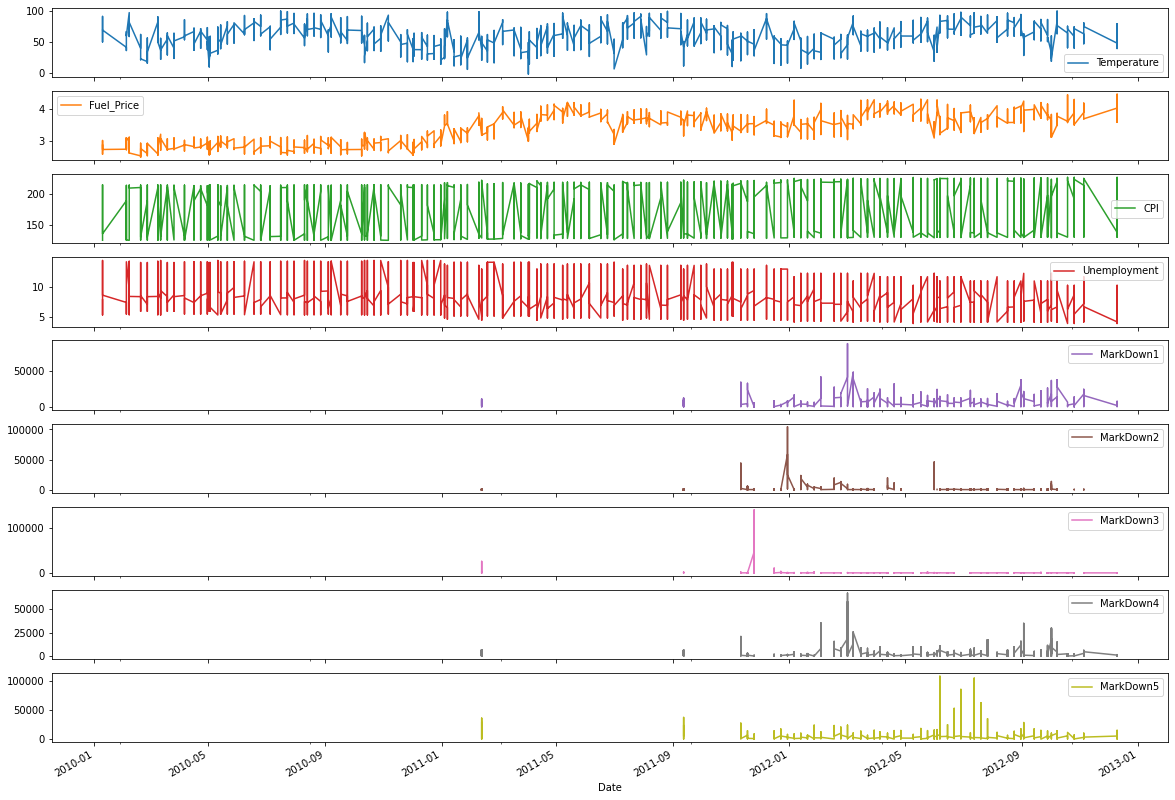

In [6]:
df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

### Plot distribution of variables

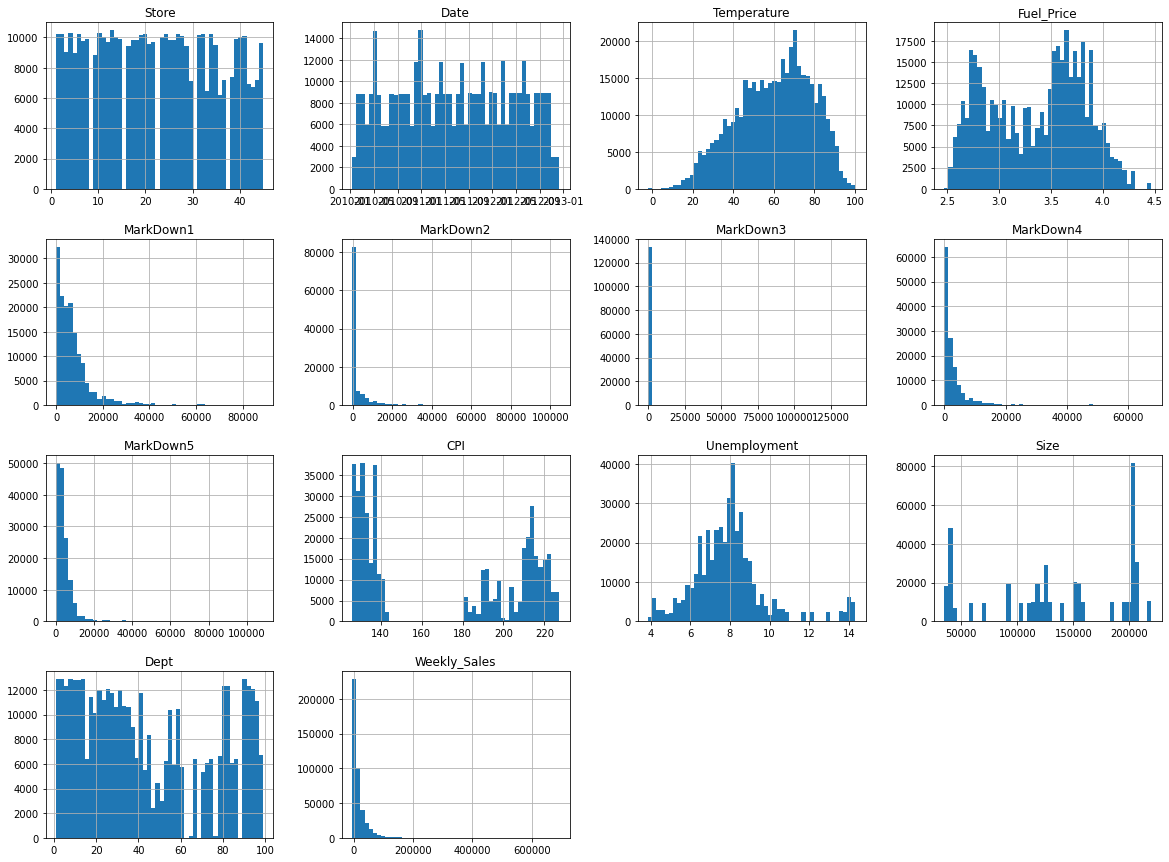

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
# Sum the weekly sales from every store to get the total weekly sales volume of the retail chain
df_total_weekly_sales = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_weekly_sales = df_total_weekly_sales.sort_values('Weekly_Sales', ascending=False)

fig = px.line(df_total_weekly_sales, x='Date', y='Weekly_Sales', title='Total weekly sales volume', width=1200, height=800, template='plotly', 
              labels={
                  'x':'Date', 'Weekly_Sales':'Weekly sales volume'
              }
            )
fig.show()

In [9]:
# Top 5 remunerative weeks
df_weekly_sales.head()

,Date,Weekly_Sales
46,2010-12-24,80931415.60
98,2011-12-23,76998241.31
95,2011-11-25,66593605.26
41,2010-11-26,65821003.24
45,2010-12-17,61820799.85


In [10]:
# Bottom 5 remunerative weeks
df_weekly_sales[::-1].head()

,Date,Weekly_Sales
52,2011-01-28,39599852.99
103,2012-01-27,39834974.67
47,2010-12-31,40432519.00
51,2011-01-21,40654648.03
50,2011-01-14,40673678.04


In [11]:
# Top performing store type in term of sales
df_top_stores = df.groupby(by=['Type'], as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False)

,Type,Weekly_Sales
0,A,4.331015e+09
1,B,2.000701e+09
2,C,4.055035e+08


### Plot correlation of variables

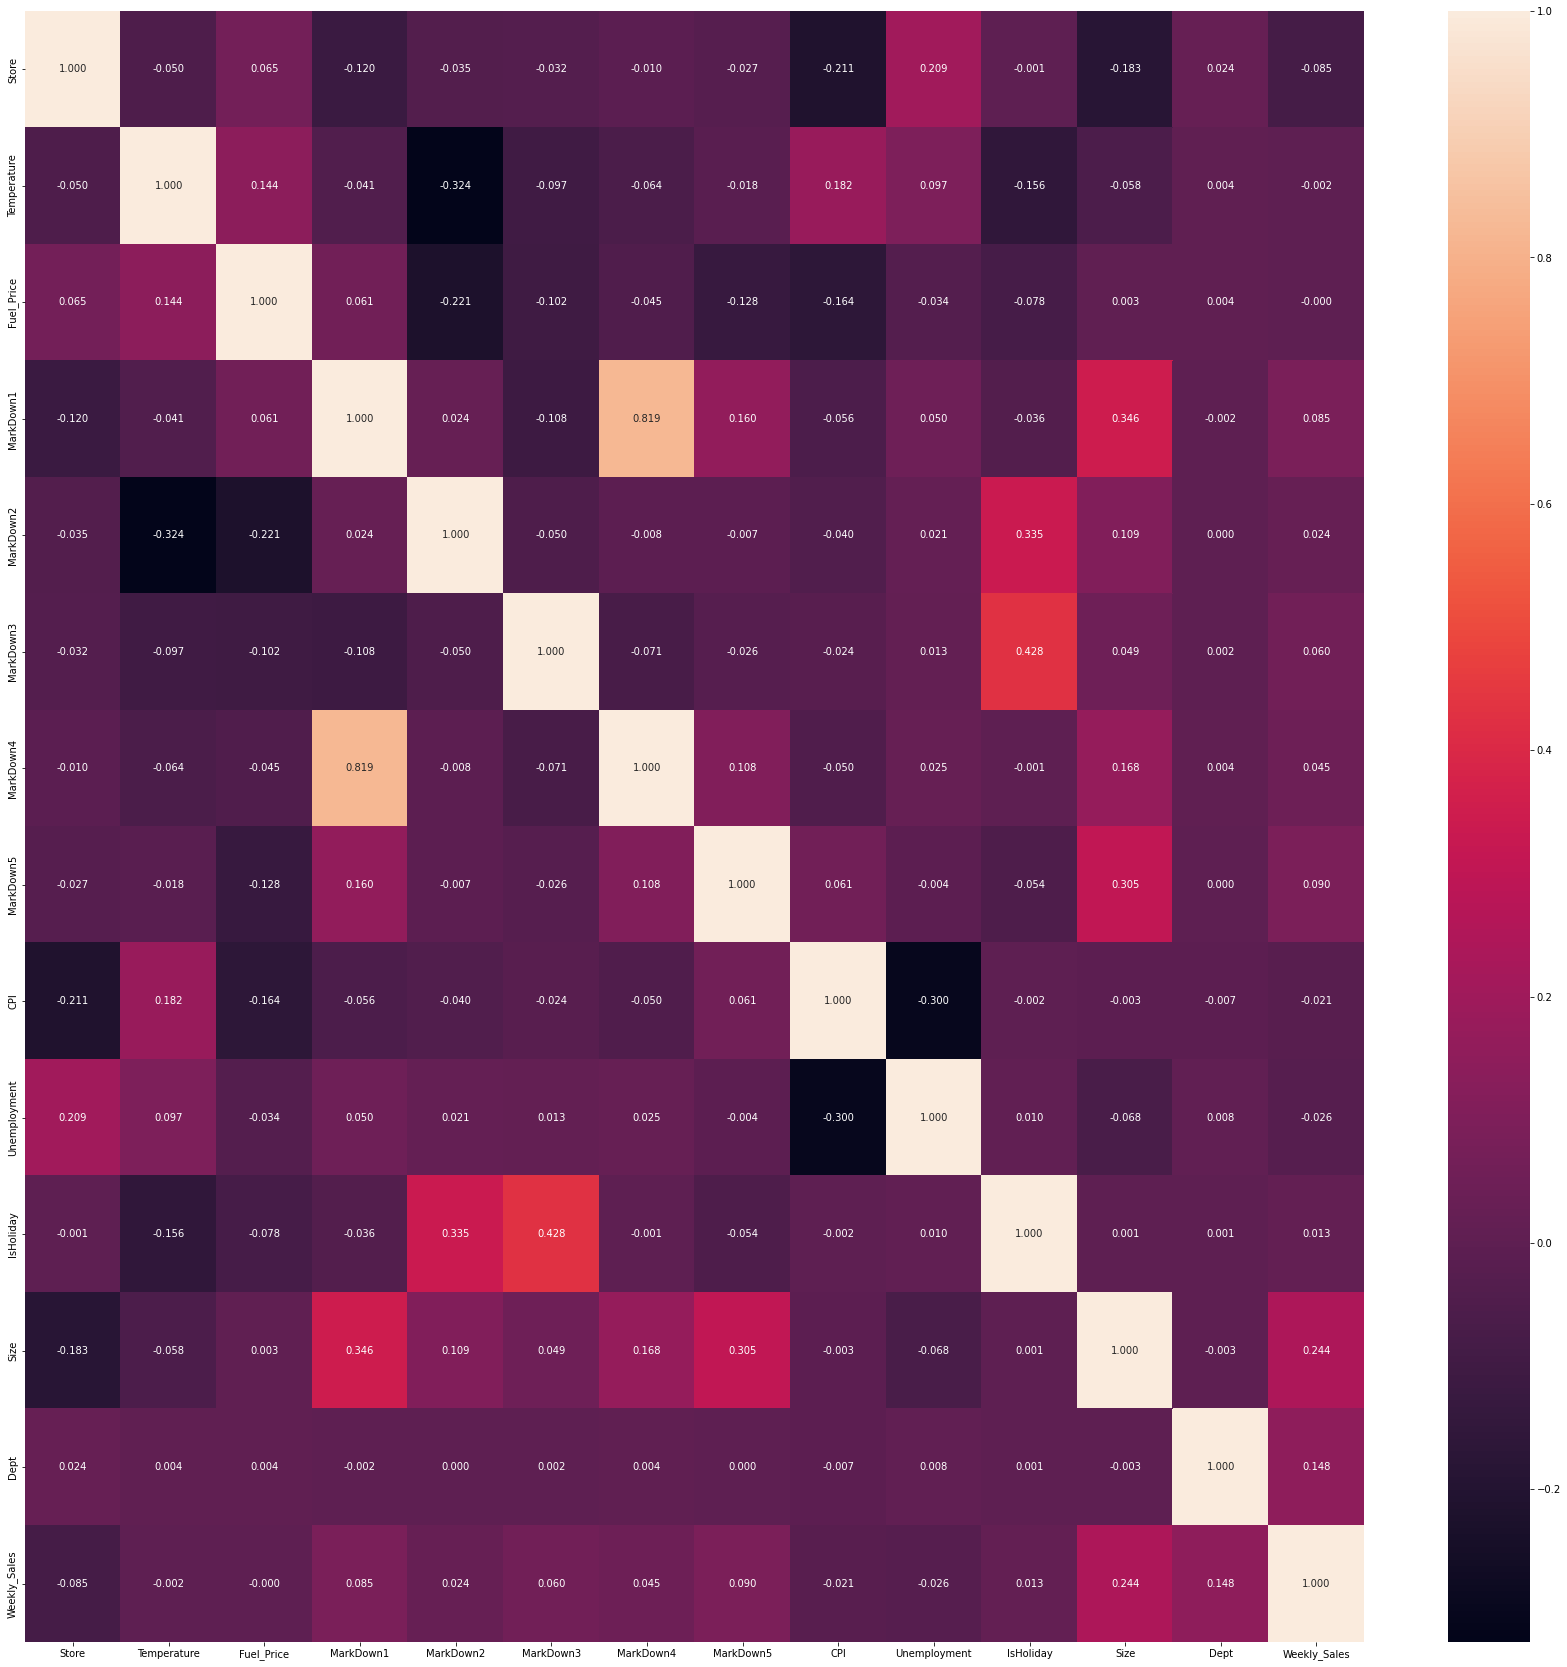

In [12]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, 
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

### Question 1 (1 pt)
Which feature has the highest correlation with "Weekly_Sales" except itself? 

$\color{blue}{\textit Your Answer:}$  *The "Weekly_Sales" has the highest correlation with "Size"  with correlation coefficient of 0.244*

Choose the top 4 most correlated features with "Weekly_Sales". Fill in the following attributes to visualize their scatter plots.

In [13]:
attributes = ['Size', 'Dept','MarkDown1','MarkDown5'] 
fig = px.scatter_matrix(df[attributes], width=1200, height=800)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

### Data preparation for ML models

In [14]:
one_hot_encoding = pd.get_dummies(df['Type'])
df = df.join(one_hot_encoding)
df = df.drop(columns=['Type'])
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,A,B,C
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,151315,1,24924.50,1,0,0
1,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,151315,2,50605.27,1,0,0
2,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,151315,3,13740.12,1,0,0
3,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,151315,4,39954.04,1,0,0
4,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,151315,5,32229.38,1,0,0


In order to interpolate NaN values, the dataframe must be indexed by Date

In [15]:
df = df.set_index(['Date', 'Store', 'Dept']).sort_index()

In [16]:
df['CPI'] = df['CPI'].interpolate(method='linear')
df['Unemployment'] = df['Unemployment'].interpolate(method='linear')

In [17]:
# Check for null values
df.isna().sum()

Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Size                 0
Weekly_Sales         0
A                    0
B                    0
C                    0
dtype: int64

In [18]:
df['MarkDown1'] = IterativeImputer(random_state=0).fit_transform(df['MarkDown1'].values.reshape(-1, 1))
df['MarkDown2'] = IterativeImputer(random_state=0).fit_transform(df['MarkDown2'].values.reshape(-1, 1))
df['MarkDown3'] = IterativeImputer(random_state=0).fit_transform(df['MarkDown3'].values.reshape(-1, 1))
df['MarkDown4'] = IterativeImputer(random_state=0).fit_transform(df['MarkDown4'].values.reshape(-1, 1))
df['MarkDown5'] = IterativeImputer(random_state=0).fit_transform(df['MarkDown5'].values.reshape(-1, 1))

In [19]:
df = df.reset_index()

In [20]:
df = df[df['Dept'].notna()]

In [21]:
# Date should be decomposed into Year and a cyclical feature for Day of Year
df['Year'] = df['Date'].dt.year
df['DayOfYear'] = df['Date'].dt.day
df['DayOfYearCos'] = np.cos(df['DayOfYear'])
df['DayOfYearSin'] = np.sin(df['DayOfYear'])

In [22]:
df.head()

,Date,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Weekly_Sales,A,B,C,Year,DayOfYear,DayOfYearCos,DayOfYearSin
0,2010-01-10,1,1,71.89,2.603,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.671989,7.838,False,151315,20094.19,1,0,0,2010,10,-0.839072,-0.544021
1,2010-01-10,1,2,71.89,2.603,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.671989,7.838,False,151315,45829.02,1,0,0,2010,10,-0.839072,-0.544021
2,2010-01-10,1,3,71.89,2.603,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.671989,7.838,False,151315,9775.17,1,0,0,2010,10,-0.839072,-0.544021
3,2010-01-10,1,4,71.89,2.603,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.671989,7.838,False,151315,34912.45,1,0,0,2010,10,-0.839072,-0.544021
4,2010-01-10,1,5,71.89,2.603,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.671989,7.838,False,151315,23381.38,1,0,0,2010,10,-0.839072,-0.544021


In [23]:
# Normalizing values between 0 and 1
df['Store'] = MinMaxScaler().fit_transform(df['Store'].values.reshape((-1, 1)))
df['Temperature'] = MinMaxScaler().fit_transform(df['Temperature'].values.reshape((-1, 1)))
df['Fuel_Price'] = MinMaxScaler().fit_transform(df['Fuel_Price'].values.reshape((-1, 1)))
df['MarkDown1'] = MinMaxScaler().fit_transform(df['MarkDown1'].values.reshape((-1, 1)))
df['MarkDown2'] = MinMaxScaler().fit_transform(df['MarkDown2'].values.reshape((-1, 1)))
df['MarkDown3'] = MinMaxScaler().fit_transform(df['MarkDown3'].values.reshape((-1, 1)))
df['MarkDown4'] = MinMaxScaler().fit_transform(df['MarkDown4'].values.reshape((-1, 1)))
df['MarkDown5'] = MinMaxScaler().fit_transform(df['MarkDown5'].values.reshape((-1, 1)))
df['CPI'] = MinMaxScaler().fit_transform(df['CPI'].values.reshape((-1, 1)))
df['Unemployment'] = MinMaxScaler().fit_transform(df['Unemployment'].values.reshape((-1, 1)))
df['IsHoliday'] = df['IsHoliday'].astype(int)
df['Dept'] = MinMaxScaler().fit_transform(df['Dept'].values.reshape((-1, 1)))
df['Weekly_Sales'] = MinMaxScaler().fit_transform(df['Weekly_Sales'].values.reshape((-1, 1)))
df['Size'] = MinMaxScaler().fit_transform(df['Size'].values.reshape((-1, 1)))

In [24]:
df = df.set_index('Date')

In [25]:
X = df.drop(columns=['Weekly_Sales', 'Year', 'DayOfYear']).values
y = df['Weekly_Sales'].values

In [26]:
# Split training set into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=STATE)

In [27]:
dtr_regressor = DecisionTreeRegressor(max_depth=50, min_samples_leaf=200, random_state=STATE)
dtr_regressor = dtr_regressor.fit(X_train, y_train)
y_pred = dtr_regressor.predict(X_test)
r2_test = dtr_regressor.score(X_test, y_test)
print('R2 Score for test set:', r2_test)

R2 Score for test set: 0.8608393788432436


### Question 2 (4 pts) 
Use grid search with 5-fold cross-validation (with help of 'Grid Search CV' class) to find good hyperparameter values for a DecisionTreeRegressor. 
*(Hint: try various values for 'max_depth', 'min_samples_leaf', 'max_leaf_nodes' in the range 0-200)*

Measure your model's performance on the test set. 

In [28]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt



In [29]:
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [30]:
#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
#view mean absolute error
mean(absolute(scores))

0.020856735236303797

In [31]:
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

### Question 3 (8 pts)
Try different boosting regressors from 'sklearn.ensemble' (RandomForest, AdaBoost) with Grid Search CV and report their testing and prediction accuracies

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
rf = RandomForestRegressor()
from sklearn.decomposition import PCA
# Random search of parameters, using 5 fold cross validation, 
# search across 200 different combinations, and use all available cores

pca = PCA()
pipe_lr = Pipeline([('pca', pca),
                    ('regr', LinearRegression())])

param_grid = {'pca__n_components': np.arange(2, X.shape[1])}

gs = GridSearchCV(estimator=pipe_lr,param_grid=param_grid,cv=5)
gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)


### Question 4 (7 pts)
Ensemble (stack) the regressors from the above and report the R2 score on test set.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

In [ ]:
reg=StackingRegressor(estimators=rf,final_estimator=RandomForestRegressor(n_estimators=5, random_state=42))

In [ ]:
reg

StackingRegressor(estimators=RandomForestRegressor(),
                  final_estimator=RandomForestRegressor(n_estimators=5,
                                                        random_state=42))